## USP - EACH - SIN5007 - Reconhecimento de Padrões - 1º SEM 2020

## Classificação de Modelos cardíacos tridimensionais relacionada à presença ou ausência de cardimiopatia


**Grupo H(8):** <br />
Diego Dedize <br />
Luiz Gustavo Silva <br />
Johnny Demetrius <br />
Vagner Mendonça Gonçalves <br />

version 0.1 - 03/04/2020

**Objetivo:** aplicar modelos de classificação  e avaliar os resultados obtidos em um dataset composto por vetores de características extraídas de modelos 3D reconstruídos a partir de exames de Ressonancia Magnética Cardíaca (RMC).

**Cardiomiopatia:** quadro clínico dado por uma anormalidade no miocárdio (estrutura muscular do coração) (KUMAR et al., 2010 apud BERGAMASCO, 2018).

**Fonte dos dados:** Dataset disponibilizado pelo Laboratório de Aplicações de Informática em Saúde (LApIS) - EACH/USP, coordenado pela Profa. Dra. Fátima L. S. Nunes.

**Referências:** <br />
BERGAMASCO, Leila Cristina Carneiro. Recuperação de imagens cardíacas tridimensionais por conteúdo. 2013. 134 f. Dissertação (Mestrado em Ciências) - Programa de Pós-graduação em Sistemas de Informação, Escola de Artes, Ciências e Humanidades, Universidade de São Paulo, São Paulo, 2013. 

BERGAMASCO, Leila Cristina Carneiro. Recuperação de objetos médicos 3D utilizando harmônicos esféricos e redes de fluxo. 2018. 181 f. Tese (Doutorado em Ciências) - Escola Politécnica, Departamento de Engenharia da Computação e Sistemas Digitais, Universidade de São Paulo, São Paulo, 2018.

KUMAR, V.; ABBAS, A. K.; FAUSTO, N.; ASTER, J. C.. Robbins & Cotran – Patologia: Bases Patológicas das Doenças. 8 ed. Rio de Janeiro: Elsevier, 2010.


# Importanto bibliotecas importantes

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import missingno as msno

# Importando arquivo

In [2]:
df_inicial = pd.read_csv("Total_SPHARM_20200326.csv",header=None)
df_inicial.head()

,0,1,2,3,4,5,6,7,8,9,...,707,708,709,710,711,712,713,714,715,716
0,id001,29,M,-7881.480247,-5759.969698,-24465.608592,-15275.106756,-22974.378070,-22686.138288,-6131.488463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,id002,31,M,-567.772697,-33.292309,-465.179132,-525.981010,-469.546900,-305.182676,-89.243364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,id003,27,M,-135372.767326,-115124.114646,-772665.053883,-292331.423079,-58059.255010,-118464.329594,-585147.837935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,id004,52,M,-582.939571,-366.425893,-281.022452,-437.739821,-206.814933,-230.346112,-126.535277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,id005,56,M,-913.082501,-334.221895,-449.102108,-113.637478,-50.065343,-127.180338,-640.351614,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


# Ajustando cabeçalho

In [3]:
df_inicial.shape

(400, 717)

In [4]:
df_inicial.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            707, 708, 709, 710, 711, 712, 713, 714, 715, 716],
           dtype='int64', length=717)

In [5]:
colunas_1 =['id','age','sex']
colunas_1

['id', 'age', 'sex']

In [6]:
#Faz loop para nomear coluna de coeficientes harmônicos
colunas_2 = []
for i in range(1,714):
     colunas_2.append(str(i))

In [7]:
#Essa é a coluna das classes: Normal, CDM, CMH
coluna_3 = ['class_id']

In [8]:
#Ajusta o nome do dataset
colunas_total = colunas_1 + colunas_2 + coluna_3

df_inicial.columns = colunas_total
df_inicial.head()

,id,age,sex,1,2,3,4,5,6,7,...,705,706,707,708,709,710,711,712,713,class_id
0,id001,29,M,-7881.480247,-5759.969698,-24465.608592,-15275.106756,-22974.378070,-22686.138288,-6131.488463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,id002,31,M,-567.772697,-33.292309,-465.179132,-525.981010,-469.546900,-305.182676,-89.243364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,id003,27,M,-135372.767326,-115124.114646,-772665.053883,-292331.423079,-58059.255010,-118464.329594,-585147.837935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,id004,52,M,-582.939571,-366.425893,-281.022452,-437.739821,-206.814933,-230.346112,-126.535277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,id005,56,M,-913.082501,-334.221895,-449.102108,-113.637478,-50.065343,-127.180338,-640.351614,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


### Neste ponto traduzimos as classes de acordo com os parametros indicados na apresentação 1
Registros de 1 a 101 a classe é NORMAL <br />
Registros de 102 a 218 a classe é CARDIMIOPATIA DILATADA <br />
Registros de 219 a 401 a classe é  CARTIDIOPATIA HIPERTRÓFICA <br />

In [9]:
for ind, row in df_inicial.iterrows():
    if (df_inicial.loc[ind,'class_id']==0): df_inicial.loc[ind,'class_desc'] = 'normal'
    if (df_inicial.loc[ind,'class_id']==1): df_inicial.loc[ind,'class_desc'] = 'CMH'
    if (df_inicial.loc[ind,'class_id']==2): df_inicial.loc[ind,'class_desc'] = 'CMD'

#Verifica a quantidade de cada classe
df_inicial['class_desc'].value_counts()

CMH       183
CMD       116
normal    101
Name: class_desc, dtype: int64

# Pré-processamento

In [10]:
df_inicial.head()

,id,age,sex,1,2,3,4,5,6,7,...,706,707,708,709,710,711,712,713,class_id,class_desc
0,id001,29,M,-7881.480247,-5759.969698,-24465.608592,-15275.106756,-22974.378070,-22686.138288,-6131.488463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,normal
1,id002,31,M,-567.772697,-33.292309,-465.179132,-525.981010,-469.546900,-305.182676,-89.243364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,normal
2,id003,27,M,-135372.767326,-115124.114646,-772665.053883,-292331.423079,-58059.255010,-118464.329594,-585147.837935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,normal
3,id004,52,M,-582.939571,-366.425893,-281.022452,-437.739821,-206.814933,-230.346112,-126.535277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,normal
4,id005,56,M,-913.082501,-334.221895,-449.102108,-113.637478,-50.065343,-127.180338,-640.351614,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,normal


In [11]:
df_inicial.dtypes

id             object
age            object
sex            object
1             float64
2             float64
               ...   
711           float64
712           float64
713           float64
class_id        int64
class_desc     object
Length: 718, dtype: object

/home/diego/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


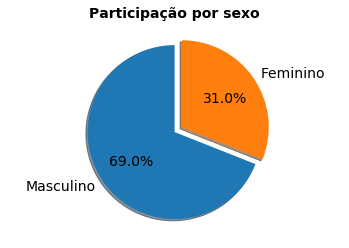

Valores absolutos:


M    276
F    124
Name: sex, dtype: int64

In [12]:
#Sabemos que sexo é uma variavel importante (conforme pesquisa Fonte), portanto esse 
#desbalanceamento pode ser um problema. Vamos acompanhar ao longo do processo


total_M = df_inicial.query('sex == "M"').groupby('sex').size()

total_F = df_inicial.query('sex == "F"').groupby('sex').size()


valores = [total_M,total_F]
series = ['Masculino','Feminino']


plt.axis('equal')
plt.rcParams.update({'font.size':14})
plt.rcParams["figure.figsize"] = [5,4]


#ax = df.plot(kind='bar', x='label', y='count', legend=None)
#plt.xaxis.set_label_text("")

# plt.axes().get_xaxis().set_visible(False) 
# plt.axes().get_yaxis().set_visible(False) 

plt.pie(valores,labels=series,autopct='%1.1f%%',
        explode=(0,0.1),shadow = True,startangle=90,)

plt.title("Participação por sexo",size=14,weight='demibold')
plt.show()

print('Valores absolutos:')
df_inicial['sex'].value_counts()

In [13]:
#dividimos assim para manter a ordem lógica do dataset (sexo,idade + coeficientes harmonicos + target)

#separa primeiras colunas
df_1 = df_inicial.iloc[:, 0:3]

for ind, row in df_inicial.iterrows():
    if (df_1.loc[ind,'sex']=='M'):
        df_1.loc[ind,'man'] = 1
    else:
        df_1.loc[ind,'man'] = 0

#deleta coluna "sexo"
df_1.drop(['sex'],axis=1,inplace=True)

#transforma sexo em inteiro
df_1['man'] = df_1['man'].astype(int)

df_1.dtypes


#seleciona as outras colunas do Dataset
df_1_2 = df_inicial.iloc[:, 3:]
df_1_2

#Junta os dois datasets
df_2 = pd.concat([df_1, df_1_2], axis = 1)
df_2

,id,age,man,1,2,3,4,5,6,7,...,706,707,708,709,710,711,712,713,class_id,class_desc
0,id001,29,1,-7881.480247,-5759.969698,-24465.608592,-15275.106756,-22974.378070,-22686.138288,-6131.488463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,normal
1,id002,31,1,-567.772697,-33.292309,-465.179132,-525.981010,-469.546900,-305.182676,-89.243364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,normal
2,id003,27,1,-135372.767326,-115124.114646,-772665.053883,-292331.423079,-58059.255010,-118464.329594,-585147.837935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,normal
3,id004,52,1,-582.939571,-366.425893,-281.022452,-437.739821,-206.814933,-230.346112,-126.535277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,normal
4,id005,56,1,-913.082501,-334.221895,-449.102108,-113.637478,-50.065343,-127.180338,-640.351614,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,id396,31,0,-183657.094277,-674567.030481,-398795.513057,-443587.182631,-131695.772953,-274452.146131,-532062.305930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,CMD
396,id397,70,1,-980.647559,-1872.218670,-520.334038,-521.624659,-130.610857,-354.899658,-1729.343947,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,CMD
397,id398,48,0,-8778.656833,-9578.976012,-3980.433446,-5960.245662,-8827.803311,-5754.876105,-1975.006261,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,CMD
398,id399,--,1,-127.196887,-5.049371,-124.475009,-160.945803,-181.699275,-199.919816,-139.060539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,CMD


# Definição do dataset

#### Dado que o numero de observações entre "sem cardiomiopatia" e "com cardimiopatia (em caso de soma CDM+CMH") ficaria desbalanceado, optamos por trabalhar com as classes nomal e CMD

In [14]:
#Verifica a quantidade de cada classe
df_2['class_desc'].value_counts()

CMH       183
CMD       116
normal    101
Name: class_desc, dtype: int64

In [15]:
#Determinando quais classes uremos utilizar
df_3 = df_2[df_2['class_id']!=1]
df_3['class_desc'].value_counts()

CMD       116
normal    101
Name: class_desc, dtype: int64

In [16]:
for ind, row in df_3.iterrows():
    if (df_3.loc[ind,'class_id']==0):
        df_3.loc[ind,'target'] = 0
    else:
        df_3.loc[ind,'target'] = 1

df_3['target']= df_3['target'].astype(int)
df_3['target'].value_counts()

/home/diego/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/diego/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/diego/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

1    116
0    101
Name: target, dtype: int64

### Verificando Missing Values

In [17]:
df_3.isnull().sum()

id              0
age             2
man             0
1               0
2               0
             ... 
712           216
713           216
class_id        0
class_desc      0
target          0
Length: 719, dtype: int64

In [18]:
# Para os valores abaixo consideramos a média das idades
age1 = df_3[df_3.age.isnull()]
age2 = df_3[df_3['age']=='--']
age3 = df_3[df_3['age']=='N']

#Visualizar todas as classes que iremos tratar
age_tratar = pd.concat([age1,age2,age3])
age_tratar

,id,age,man,1,2,3,4,5,6,7,...,707,708,709,710,711,712,713,class_id,class_desc,target
309,id310,NaN,1,-8.688074e+04,-6.297901e+04,-4.293610e+04,-6.149481e+04,-1.138161e+05,-9.865080e+04,-9.860170e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,CMD,1
318,id319,NaN,0,-7.302413e+02,-3.436107e+01,-3.917077e+02,-5.953257e+02,-1.334070e+03,-1.720316e+03,-1.497228e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,CMD,1
324,id325,--,1,-7.311505e+06,-4.164692e+06,-8.119380e+06,-7.810552e+06,-7.276998e+06,-8.178894e+06,-7.834229e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,CMD,1
398,id399,--,1,-1.271969e+02,-5.049371e+00,-1.244750e+02,-1.609458e+02,-1.816993e+02,-1.999198e+02,-1.390605e+02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,CMD,1
390,id391,N,1,-3.112529e+03,-9.422838e+01,-2.911332e+03,-4.376021e+03,-2.210641e+03,-2.191020e+03,-1.831425e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,CMD,1


In [19]:
df_3_1 = df_3

#altera todos os valores para 0
df_3_1['age'].replace('--',0,inplace=True)
df_3_1['age'].replace('N',0,inplace=True)
df_3_1['age'] = df_3_1['age'].fillna(0)


df_3_1['age']=df_3_1['age'].astype(int)

/home/diego/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/home/diego/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/diego/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [20]:
#calcula média das idades
media_idade = int(df_3_1.age.mean())
media_idade

46

In [21]:
df_3_1['age'].replace(0,media_idade,inplace=True)
df_4 = df_3_1

### Verificando percentual de missing por coluna

In [22]:
# É possivel notar que em muitas colunas temos apenas 1 observação preenchida
dados_vazios = (df_4.isnull().sum()/len(df_4['id']))*100
dados_vazios

id             0.000000
age            0.000000
man            0.000000
1              0.000000
2              0.000000
                ...    
712           99.539171
713           99.539171
class_id       0.000000
class_desc     0.000000
target         0.000000
Length: 719, dtype: float64

In [23]:
dados_vazios.tail(15)

702           99.539171
703           99.539171
704           99.539171
705           99.539171
706           99.539171
707           99.539171
708           99.539171
709           99.539171
710           99.539171
711           99.539171
712           99.539171
713           99.539171
class_id       0.000000
class_desc     0.000000
target         0.000000
dtype: float64

In [24]:
df_4.count()

id            217
age           217
man           217
1             217
2             217
             ... 
712             1
713             1
class_id      217
class_desc    217
target        217
Length: 719, dtype: int64

In [25]:
df_4['702'].isnull().sum()

216

In [26]:
#Abaixo podemos notar a quantidade de atributos que está com 99% de suas observações vazias
dados_nulos = pd.DataFrame(data=dados_vazios)
dados_nulos.columns = ['vazios']
dados_nulos.sort_values(by=['vazios'], ascending=False)

,vazios
651,99.539171
647,99.539171
637,99.539171
638,99.539171
639,99.539171
...,...
36,0.000000
35,0.000000
34,0.000000
33,0.000000


In [27]:
dados_nulos[dados_nulos['vazios']>50]

,vazios
302,51.152074
303,51.152074
304,51.612903
305,52.534562
306,52.995392
...,...
709,99.539171
710,99.539171
711,99.539171
712,99.539171


### Abaixo é possivel notar que temos 412 features que estão mais de 50% vazias no datase

In [28]:
dados_nulos[dados_nulos['vazios']>50].count()

vazios    412
dtype: int64

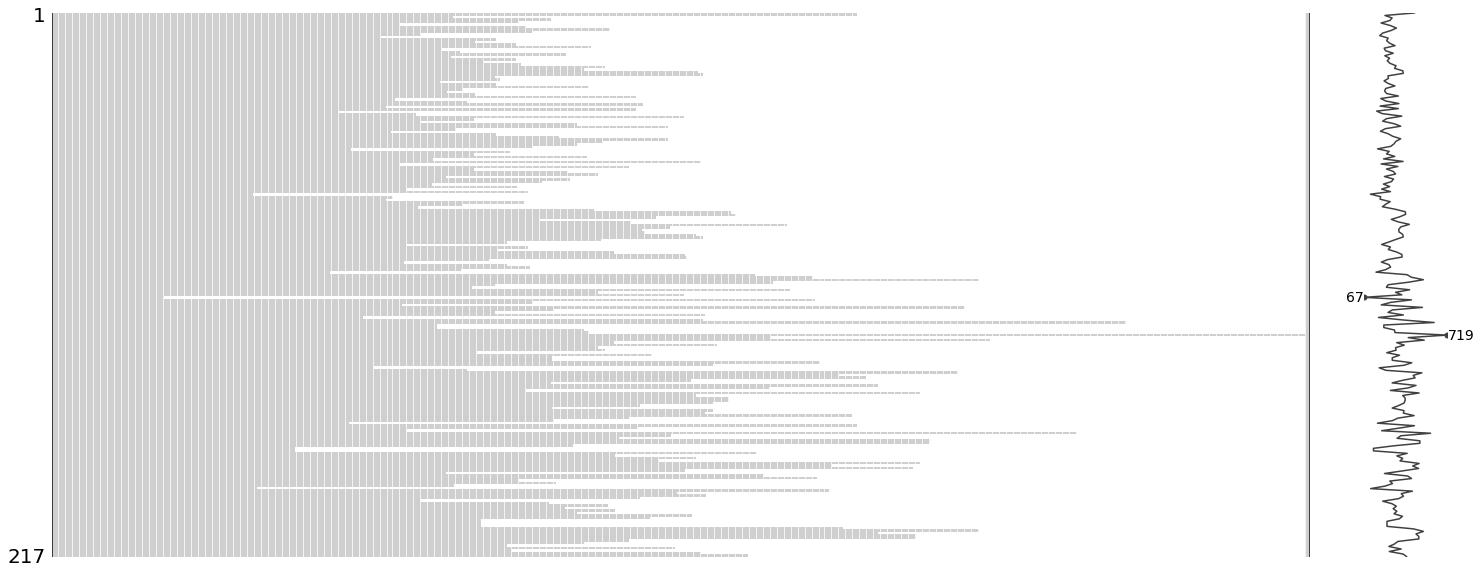

In [29]:
#Com o gráfico abaixo é possivel notar que quando caminhamos para a direita no dataset
#cada vez mais temos ocorrencias de valores nulos
#como temos bastantes features não é possivel avaliar, dessa forma vamos avaliar por grupos

msno.matrix(df_4) 

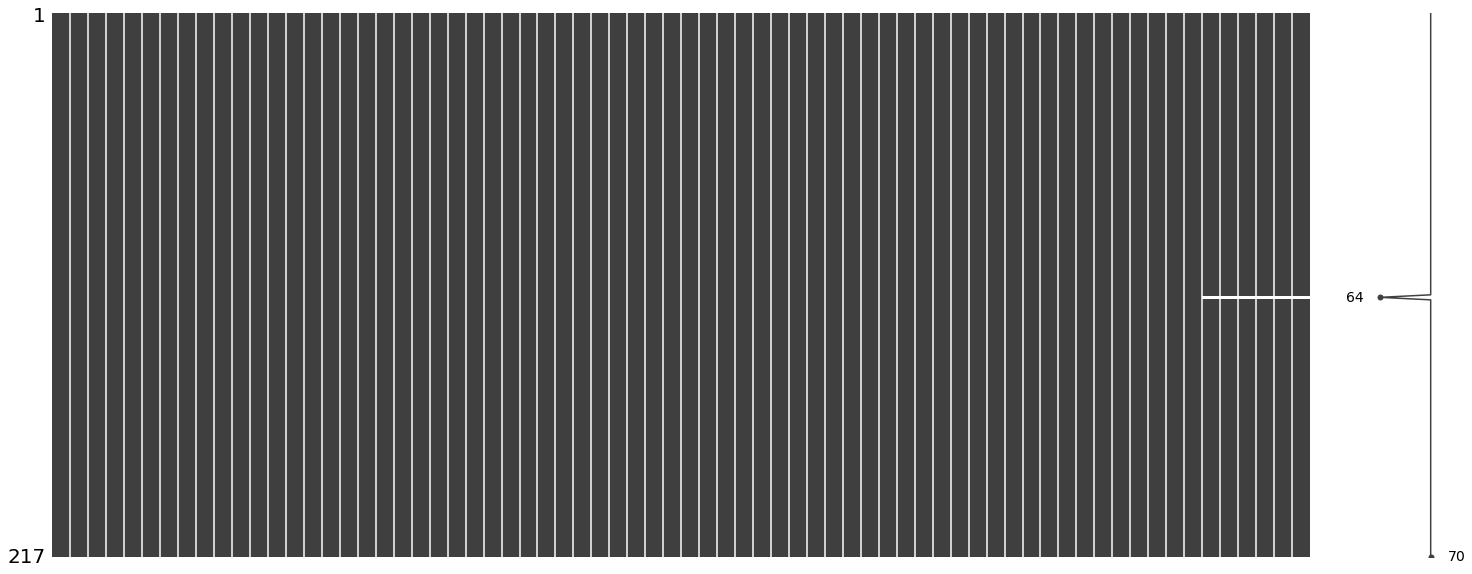

In [30]:
# Quando agrupamos a cada 70 atributos é possivel notar que temos valores faltanto 
# a partir da coluna 64
msno.matrix(df_4.iloc[:, 0:70]) 

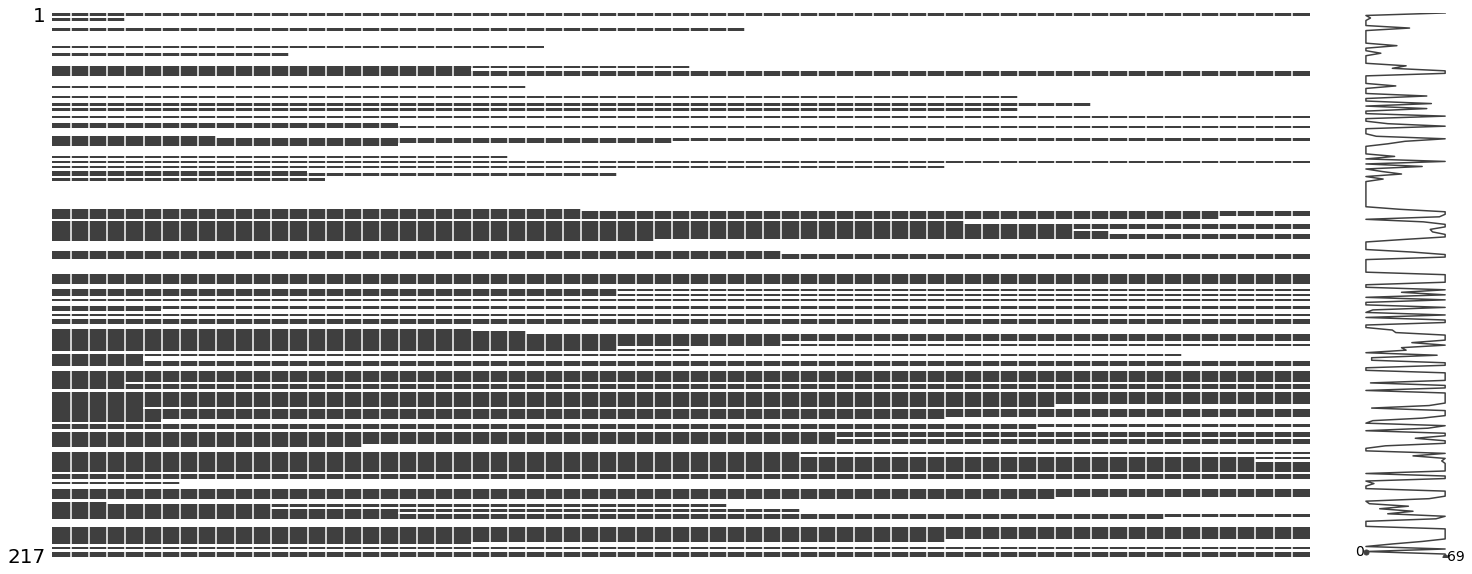

In [31]:
msno.matrix(df_4.iloc[:, 281:350]) 

### Tratando os missings para PCA:

Como verificamos na análise acima temos muitas features com valores faltando, desta forma faremos algumas tentativas de transformações de feature para tentar minizar o impacto dos valores nulos sem descaracterizar o dataset.

1. Separar o dataset entre: Atributos SPHARMS e Demais atributos;
2. Criar feature Soma de SPHARMS;

In [32]:
df_4.head(2)

,id,age,man,1,2,3,4,5,6,7,...,707,708,709,710,711,712,713,class_id,class_desc,target
0,id001,29,1,-7881.480247,-5759.969698,-24465.608592,-15275.106756,-22974.37807,-22686.138288,-6131.488463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,normal,0
1,id002,31,1,-567.772697,-33.292309,-465.179132,-525.981010,-469.54690,-305.182676,-89.243364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,normal,0


In [33]:
df_spharm = df_4.iloc[:,3:716]
df_spharm.head(5)

,1,2,3,4,5,6,7,8,9,10,...,704,705,706,707,708,709,710,711,712,713
0,-7881.480247,-5759.969698,-24465.608592,-15275.106756,-22974.378070,-22686.138288,-6131.488463,-7721.934250,-561.587565,-21578.984118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-567.772697,-33.292309,-465.179132,-525.981010,-469.546900,-305.182676,-89.243364,-850.207787,-253.604423,-165.953381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-135372.767326,-115124.114646,-772665.053883,-292331.423079,-58059.255010,-118464.329594,-585147.837935,-110250.502801,-63135.656772,-116498.553945,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-582.939571,-366.425893,-281.022452,-437.739821,-206.814933,-230.346112,-126.535277,-294.784467,-148.136252,-122.652759,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-913.082501,-334.221895,-449.102108,-113.637478,-50.065343,-127.180338,-640.351614,-551.165249,-284.329115,-89.161061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
dados_soma = df_spharm.sum(axis=1,skipna=True,numeric_only=True)
coluna_soma = pd.DataFrame(data=dados_soma,columns=['soma_spharms'])
coluna_soma

df_spharm = pd.concat([df_spharm, coluna_soma], axis = 1)
df_spharm.tail()

,1,2,3,4,5,6,7,8,9,10,...,705,706,707,708,709,710,711,712,713,soma_spharms
395,-183657.094277,-674567.030481,-398795.513057,-443587.182631,-131695.772953,-274452.146131,-532062.305930,-427517.989250,-406682.851064,-263643.956109,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.023857e+08
396,-980.647559,-1872.218670,-520.334038,-521.624659,-130.610857,-354.899658,-1729.343947,-1953.198949,-2080.521148,-88.232738,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.826190e+05
397,-8778.656833,-9578.976012,-3980.433446,-5960.245662,-8827.803311,-5754.876105,-1975.006261,-7098.336887,-1207.964918,-8424.539167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.223793e+06
398,-127.196887,-5.049371,-124.475009,-160.945803,-181.699275,-199.919816,-139.060539,-41.128519,-182.435120,-97.002807,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.335071e+04
399,-450.401501,-122.738714,-338.262264,-466.144315,-339.253329,-779.210985,-445.468625,-334.556179,-462.754439,-28.552358,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.913077e+05


In [35]:
df_demais_1 = df_4.iloc[:,1:3]
df_demais_1.head()

,age,man
0,29,1
1,31,1
2,27,1
3,52,1
4,56,1


In [36]:
df_demais_2 = df_4.iloc[:,718:719]
df_demais_2.head()

,target
0,0
1,0
2,0
3,0
4,0


In [37]:
df_demais = pd.concat([df_demais_1, df_demais_2], axis = 1)
df_demais.tail()

,age,man,target
395,31,0,1
396,70,1,1
397,48,0,1
398,46,1,1
399,46,0,1


### PCA primeira abordagem: Com soma de coeficientes harmonicos e normalizado

In [38]:
pca_1 = pd.concat([df_demais, df_spharm['soma_spharms']], axis = 1)
pca_1.head()

,age,man,target,soma_spharms
0,29,1,0,-5.601981e+06
1,31,1,0,-1.267293e+05
2,27,1,0,-1.153833e+08
3,52,1,0,-1.197444e+05
4,56,1,0,-7.692539e+04


In [39]:
# Separando as fetures
feat = ['age', 'man', 'soma_spharms']
x = pca_1.loc[:, feat].values

# Separa target
y = pca_1.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [40]:
#dados normalizados
pca_1_normal = pd.DataFrame(data=x,columns = feat)

pca_1_y =  pd.DataFrame(data=y,columns = ['target'])

pca_1_normal.tail()
pca_1_y.tail()

,target
212,1
213,1
214,1
215,1
216,1


In [41]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [42]:
finalDf = pd.concat([principalDf, pca_1_y], axis = 1)
finalDf

,principal component 1,principal component 2,target
0,1.100188,-0.348617,0
1,1.011685,-0.361105,0
2,1.289917,0.040022,0
3,0.138190,-0.284938,0
4,-0.028230,-0.270579,0
...,...,...,...
212,-0.487913,0.727529,1
213,-0.610259,-0.218682,1
214,-1.293197,0.424397,1
215,0.387674,-0.307019,1


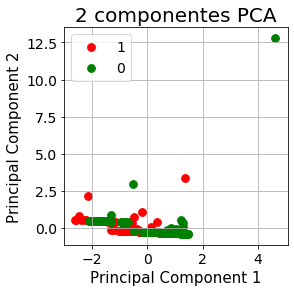

In [43]:
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 componentes PCA', fontsize = 20)

targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 60)
ax.legend(targets)
ax.grid()

## Conclusão: Com essa primeira abordagem não temos uma boa separação entre classes

Juntos os componentes 1 e 2 contém 73% dasinformações do dataset

In [44]:
pca.explained_variance_ratio_

array([0.40472311, 0.33033116])